## Desafio Kaggle: Titanic - Machine Learning from Disaster
#### https://www.kaggle.com/c/titanic/overview

### Imports das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette()
sns.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In /home/liliane-hop/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/liliane-hop/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/liliane-hop/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


### Carregamento dos dados

In [2]:
train = pd.read_csv('data/train.csv')
print('Train: {}'.format(train.shape))
test = pd.read_csv('data/test.csv')
print('\nTest: {}'.format(test.shape))

Train: (891, 12)

Test: (418, 11)


### Descrição do conjunto de dados

Esse conjunto contém dados dos passageiros do Titanic. Em 15 de abril de 1912, durante sua viagem inaugural, o RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

### Características do conjunto

##### 2 classes
##### 1309 exemplos
##### 12 features

- PassengerId: identificador do passageiro;
- Survived: sobrevivência. 0= não e 1= sim;
- Pclass: classe da passagem. 1= primeira classe, 2= segunda e 3= terceira;
- Name: nome do passageiro;
- Sex: sexo;
- Age: idade;
- SibSp: número de irmãos/cônjuges a bordo;
- Parch: número de pais/filhos a bordo;
- Ticket: número da passagem;
- Fare: valor da tarifa;
- Cabin: número da cabine;
- Embarked: local de embarque. C= Cherbourg, Q= Queenstown, S= Southampton

In [3]:
print('Colunas presentes: {}'.format(train.columns))

Colunas presentes: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


### Remove a coluna id dos dados

In [5]:
trainPassengerId = train['PassengerId']
train.drop(['PassengerId'], axis=1, inplace=True)

testPassengerId = test['PassengerId']
test.drop(['PassengerId'], axis=1, inplace=True)

### Amostra dos dados

In [6]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Concatena os dados

In [7]:
nTrain= train.shape[0]
nTest = test.shape[0]

In [8]:
df = pd.concat((train, test)).reset_index(drop=True)
print('Dataset shape: {} '.format(df.shape))

Dataset shape: (1309, 11) 


### Exploração dos dados

In [9]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [10]:
df.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


### Pré-processamento dos dados

#### Renomeia as colunas

In [11]:
cols = {
    'Survived': 'sobrevivente',
    'Pclass': 'classe',
    'Name': 'nome',
    'Sex': 'sexo',
    'Age': 'idade',
    'SibSp': 'irmaosEconjunges',
    'Parch': 'paisEfilhos',
    'Ticket': 'passagem',
    'Fare': 'tarifa',
    'Cabin': 'cabine',
    'Embarked': 'embarque'
}

df = df.rename(columns=cols)

#### Valores faltantes

In [12]:
df_na = df.isnull().mean()* 100
print('Valores faltantes: \n{}'.format(df_na))

Valores faltantes: 
idade               20.091673
cabine              77.463713
embarque             0.152788
tarifa               0.076394
nome                 0.000000
paisEfilhos          0.000000
classe               0.000000
sexo                 0.000000
irmaosEconjunges     0.000000
sobrevivente        31.932773
passagem             0.000000
dtype: float64


Text(0.5, 1.0, 'Valores faltantes por coluna')

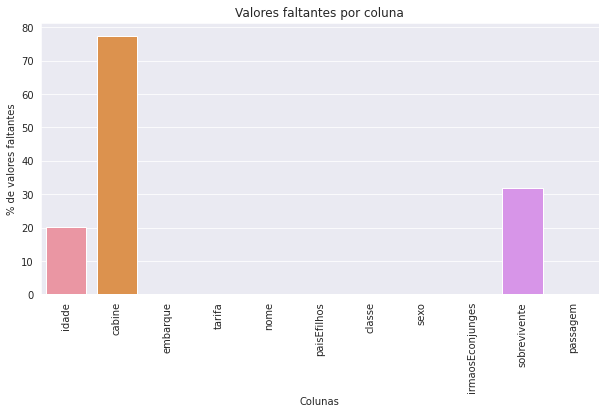

In [13]:
f, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x=df_na.index, y=df_na)

plt.xticks(rotation='90')
plt.xlabel('Colunas')
plt.ylabel('% de valores faltantes')
plt.title('Valores faltantes por coluna')

#### Tratando os dados nulos

In [14]:
df.drop(['cabine'], axis=1, inplace=True)

In [15]:
cols = ['idade', 'tarifa']

for c in cols:
    df[c] = df[c].fillna(df[c].mean())

In [16]:
cols = ['sobrevivente', 'embarque']

for c in cols:
    df[c] = df[c].fillna(df[c].mode()[0])

#### Valores duplicados

In [17]:
print('Valores duplicados: {}'.format(df.duplicated().mean()*100))

Valores duplicados: 0.0


#### Conversão de valores

In [18]:
cols = ['idade', 'sobrevivente']
for c in cols:
    df[c] = df[c].astype(int)

#### Engenharia de recursos

In [19]:
classe = df[['classe', 'sobrevivente']].groupby(['classe'], as_index=False).mean()
print('Impacto da Classe no conjunto de dados:\n')
print(classe)

Impacto da Classe no conjunto de dados:

   classe  sobrevivente
0       1      0.421053
1       2      0.314079
2       3      0.167842


Text(0.5, 1.0, 'Média de sobreviventes por classe')

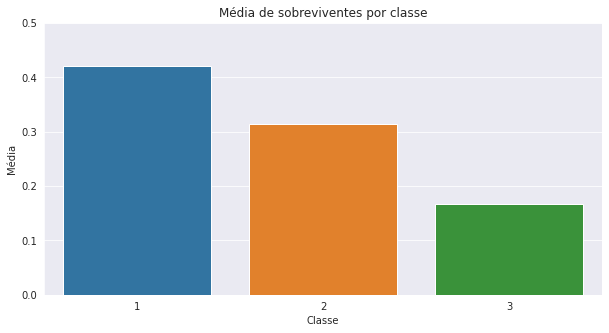

In [20]:
f, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x=classe['classe'], y=classe['sobrevivente'])

plt.ylim(0, 0.50)
plt.xlabel('Classe')
plt.ylabel('Média')
plt.title('Média de sobreviventes por classe')

In [21]:
sexo = df[['sexo', 'sobrevivente']].groupby(['sexo'], as_index=False).mean()
print('Impacto do sexo no conjunto de dados:\n')
print(sexo)

Impacto do sexo no conjunto de dados:

     sexo  sobrevivente
0  female        0.5000
1    male        0.1293


Text(0.5, 1.0, 'Média de sobreviventes por sexo')

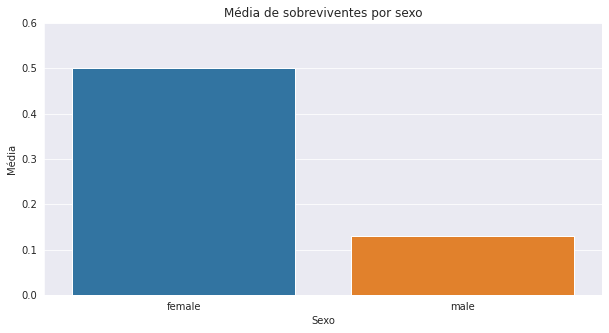

In [22]:
f, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x=sexo['sexo'], y=sexo['sobrevivente'])

plt.ylim(0, 0.60)
plt.xlabel('Sexo')
plt.ylabel('Média')
plt.title('Média de sobreviventes por sexo')

In [23]:
df['tamanhoFamilia'] = df['paisEfilhos'] + df['irmaosEconjunges'] + 1
tamanhoFamilia = df[['tamanhoFamilia', 'sobrevivente']].groupby(['tamanhoFamilia'], as_index=False).mean()
print('Impacto do tamanho da família no conjunto de dados:\n')
print(tamanhoFamilia)

Impacto do tamanho da família no conjunto de dados:

   tamanhoFamilia  sobrevivente
0               1      0.206329
1               2      0.378723
2               3      0.371069
3               4      0.488372
4               5      0.136364
5               6      0.120000
6               7      0.250000
7               8      0.000000
8              11      0.000000


Text(0.5, 1.0, 'Média de sobreviventes por tamanho da família')

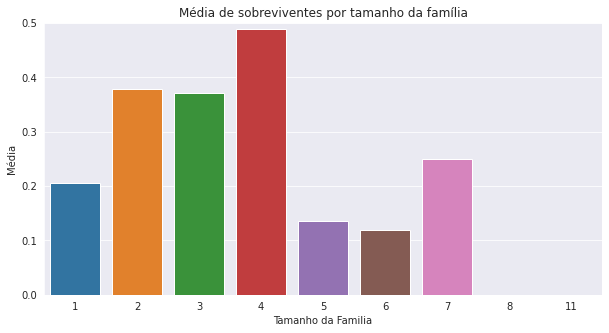

In [24]:
f, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x=tamanhoFamilia['tamanhoFamilia'], y=tamanhoFamilia['sobrevivente'])

plt.ylim(0, 0.50)
plt.xlabel('Tamanho da Familia')
plt.ylabel('Média')
plt.title('Média de sobreviventes por tamanho da família')

In [25]:
embarque = df[['embarque', 'sobrevivente']].groupby(['embarque'], as_index=False).mean()
print('Impacto do local de embarque no conjunto de dados:\n')
print(embarque)

Impacto do local de embarque no conjunto de dados:

  embarque  sobrevivente
0        C      0.344444
1        Q      0.243902
2        S      0.239083


Text(0.5, 1.0, 'Média de sobreviventes por local de embarque')

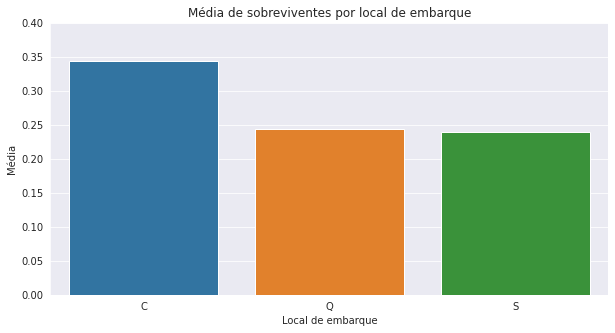

In [26]:
f, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x=embarque['embarque'], y=embarque['sobrevivente'])

plt.ylim(0, 0.40)
plt.xlabel('Local de embarque')
plt.ylabel('Média')
plt.title('Média de sobreviventes por local de embarque')

In [27]:
df['faixaIdade'] = pd.cut(df['idade'], 5)
faixaIdade = df[['faixaIdade', 'sobrevivente']].groupby(['faixaIdade'], as_index=False).mean()
print('Impacto da idade no conjunto de dados:\n')
print(faixaIdade)

Impacto da idade no conjunto de dados:

      faixaIdade  sobrevivente
0  (-0.08, 16.0]      0.410448
1   (16.0, 32.0]      0.228824
2   (32.0, 48.0]      0.283019
3   (48.0, 64.0]      0.283019
4   (64.0, 80.0]      0.076923


Text(0.5, 1.0, 'Média de sobreviventes por faixa de idade')

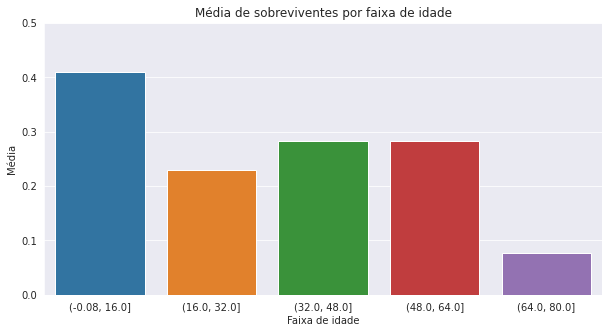

In [28]:
f, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x=faixaIdade['faixaIdade'], y=faixaIdade['sobrevivente'])

plt.ylim(0, 0.50)
plt.xlabel('Faixa de idade')
plt.ylabel('Média')
plt.title('Média de sobreviventes por faixa de idade')

#### Limpeza dos dados

In [29]:
df['sexo'] = df['sexo'].map({'female': 0, 'male': 1}).astype(int)

In [30]:
df['embarque'] = df['embarque'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [31]:
df.loc[df['idade'] <= 16, 'idade'] = 0
df.loc[df['idade'] <= 32, 'idade'] = 1
df.loc[df['idade'] <= 48, 'idade'] = 2
df.loc[df['idade'] <= 64, 'idade'] = 3
df.loc[df['idade'] > 64,  'idade'] = 4

In [32]:
df['estaSozinho'] = 0
df.loc[df['tamanhoFamilia'] == 1, 'estaSozinho'] = 1

#### Seleção de recursos

In [33]:
df.drop(['nome', 'tarifa', 'passagem', 'faixaIdade'], axis=1, inplace=True)

### Visualização dos dados

In [34]:
df.head()

,idade,embarque,paisEfilhos,classe,sexo,irmaosEconjunges,sobrevivente,tamanhoFamilia,estaSozinho
0,3,0,0,3,1,1,0,2,0
1,3,1,0,1,0,1,1,2,0
2,3,0,0,3,0,0,1,1,1
3,3,0,0,1,0,1,1,2,0
4,3,0,0,3,1,0,0,1,1


#### Correlação de Pearson

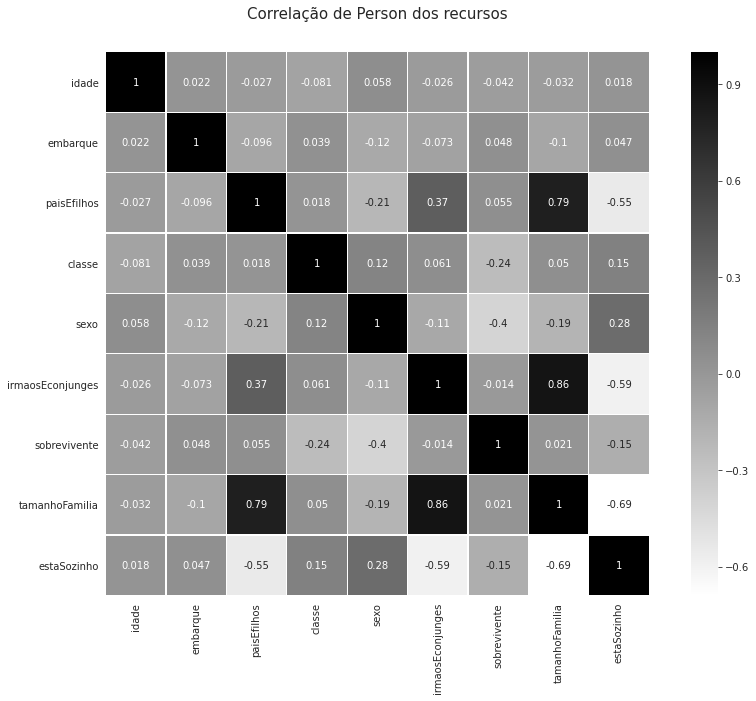

In [35]:
plt.figure(figsize=(15, 10))
plt.title('Correlação de Person dos recursos', y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.gist_yarg, linecolor='white', annot=True)